In [1]:
print("NAME: HARITHA RAMESH")
print("REG NO:212223100011")
import pandas as numpy
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")
df

NAME: HARITHA RAMESH
REG NO:212223100011


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.sum().isnull()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
from sklearn.cluster import KMeans
wcss=[]


In [6]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Elbow Method')

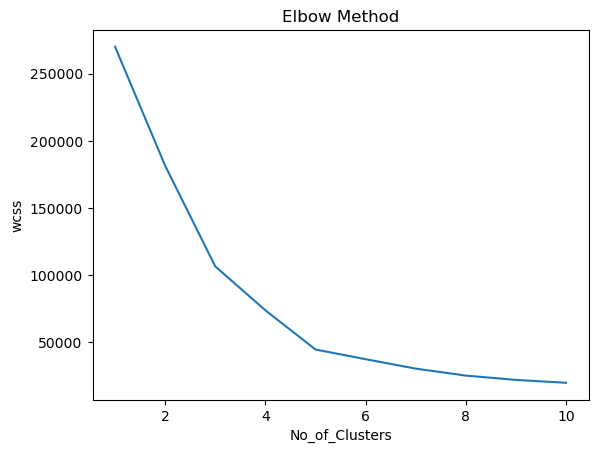

In [7]:
plt.plot(range(1,11),wcss)

plt.xlabel("No_of_Clusters")

plt.ylabel("wcss")

plt.title("Elbow Method")

In [8]:
km=KMeans(n_clusters=5)
km.fit(df.iloc[:,3:])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [9]:
y_pred=km.predict(df.iloc[:,3:])
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

Text(0.5, 1.0, 'Customer Segments')

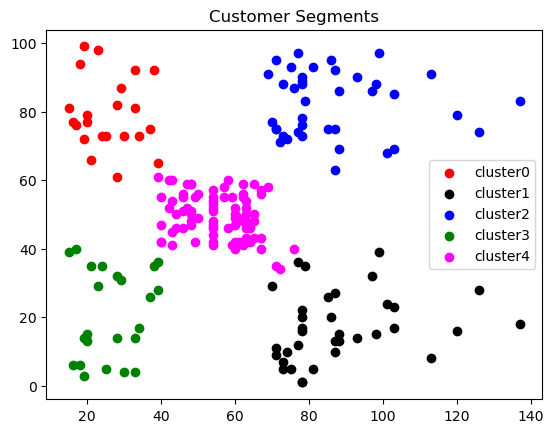

In [10]:
df["cluster"]=y_pred
df0=df[df["cluster"]==0]
df1=df[df["cluster"]==1]
df2=df[df["cluster"]==2]
df3=df[df["cluster"]==3]
df4=df[df["cluster"]==4]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="red",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="black",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="blue",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="green",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="magenta",label="cluster4")
plt.legend()
plt.title("Customer Segments")





In [11]:
print("NAME: HARITHA RAMESH")
print("REG NO:212223100011")

NAME: HARITHA RAMESH
REG NO:212223100011
